# Comparison of Bayesian classifiers under different data

### by Zijun Sun, Ruixin Li
#### *Fundamentals of Artificial Intelligence and Knowledge Representation (Mod. 3) - Alma Mater Studiorum Università di Bologna*

The dataset is downloaded from https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis. 

It dives into real-life factors like sleep quality, study load, and even bullying. Discover how the environment or even friendships can impact stress. 

This dataset contains around 20 features that create the most impact on the Stress of a Student. The features are selected scientifically considering 5 major factors, they are Psychological, Physiological, Social, Environmental, and Academic Factors. Some of them are:

Psychological Factors => 'anxiety_level', 'self_esteem', 'mental_health_history', 'depression',  

Physiological Factors => 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',  

Environmental Factors => 'noise_level', 'living_conditions', 'safety', 'basic_needs',  

Academic Factors => 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 

Social Factor => 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying'.

# Data preprocessing

## 1.Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv("./StressLevelDataset.csv")

## 2.Data normalizing and calculate the correlation of each feature with 'stress_level'

In [3]:
# Normalizing the dataset except the target column 'stress_level'
scaler = MinMaxScaler()
features = data.columns[:-1]  # Exclude 'stress_level' from normalization
data[features] = scaler.fit_transform(data[features])

# Calculate the correlation of each feature with 'stress_level'
correlation = data.corr()['stress_level'].drop('stress_level')

# Display the correlation
correlation

anxiety_level                   0.736795
self_esteem                    -0.756195
mental_health_history           0.648644
depression                      0.734379
headache                        0.713484
blood_pressure                  0.394200
sleep_quality                  -0.749068
breathing_problem               0.573984
noise_level                     0.663371
living_conditions              -0.581723
safety                         -0.709602
basic_needs                    -0.708968
academic_performance           -0.720922
study_load                      0.634156
teacher_student_relationship   -0.680163
future_career_concerns          0.742619
social_support                 -0.632497
peer_pressure                   0.690684
extracurricular_activities      0.692977
bullying                        0.751162
Name: stress_level, dtype: float64

## 3.Add feature information based on the dataset description

In [4]:
# Define the features for each category
categories = {
    'Psychological_Factors': ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression'],
    'Physiological_Factors': ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'],
    'Environmental_Factors': ['noise_level', 'living_conditions', 'safety', 'basic_needs'],
    'Academic_Factors': ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns'],
    'Social_Factors': ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']
}

# Calculate the weighted sum for each category
for category, features in categories.items():
    weights = correlation[features]
    data[category] = data[features].mul(weights).sum(axis=1)

# Reorder columns to bring the new category columns to the front
new_columns_order = list(categories.keys()) + list(data.columns[:-len(categories.keys())])
data = data[new_columns_order]

# Display the first few rows of the modified dataset
data.head()

,Psychological_Factors,Physiological_Factors,Environmental_Factors,Academic_Factors,Social_Factors,anxiety_level,self_esteem,mental_health_history,depression,headache,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0.286258,0.444953,-0.793033,-0.141418,0.708997,0.666667,0.666667,0.0,0.407407,0.4,...,0.4,0.6,0.4,0.6,0.6,0.666667,0.6,0.6,0.4,1
1,1.381263,1.417057,-0.285750,0.969726,1.785854,0.714286,0.266667,1.0,0.555556,1.0,...,0.4,0.2,0.8,0.2,1.0,0.333333,0.8,1.0,1.0,2
2,0.996742,0.215360,-0.676689,-0.018926,0.570401,0.571429,0.600000,1.0,0.518519,0.4,...,0.4,0.4,0.6,0.6,0.4,0.666667,0.6,0.4,0.4,1
3,1.315522,1.159564,-0.269420,0.677018,1.647259,0.761905,0.400000,1.0,0.555556,0.8,...,0.4,0.4,0.8,0.2,0.8,0.333333,0.8,0.8,1.0,2
4,0.045980,0.045322,-0.827728,-0.035230,1.231014,0.761905,0.933333,0.0,0.259259,0.4,...,0.6,0.8,0.6,0.2,0.4,0.333333,1.0,0.0,1.0,1


## 4.Filtering features with absolute correlation values greater than 0.7

In [5]:
corr = data.corrwith(data['stress_level']).sort_values(ascending=False)

# Filter out the features with a correlation greater than 0.7
similar_features = corr[abs(corr) > 0.7]

In [6]:
# List of features with correlation greater than 0.7
features_list = similar_features.index.tolist()

# Display the list of features
features_list

['stress_level',
 'Social_Factors',
 'Academic_Factors',
 'Psychological_Factors',
 'Environmental_Factors',
 'Physiological_Factors',
 'bullying',
 'future_career_concerns',
 'anxiety_level',
 'depression',
 'headache',
 'basic_needs',
 'safety',
 'academic_performance',
 'sleep_quality',
 'self_esteem']

In [7]:
data = data[features_list]

## 5.Let the computational features be on a scale with the rest of the features

In [8]:
scaler = MinMaxScaler()
features = data.columns[1: ]  # Exclude 'stress_level' from normalization
data[features] = scaler.fit_transform(data[features])

In [9]:
data

,stress_level,Social_Factors,Academic_Factors,Psychological_Factors,Environmental_Factors,Physiological_Factors,bullying,future_career_concerns,anxiety_level,depression,headache,basic_needs,safety,academic_performance,sleep_quality,self_esteem
0,1,0.415363,0.416752,0.369453,0.447660,0.397255,0.4,0.6,0.666667,0.407407,0.4,0.4,0.6,0.6,0.4,0.666667
1,2,0.904452,0.885636,0.757530,0.660798,0.919513,1.0,1.0,0.714286,0.555556,1.0,0.4,0.4,0.2,0.2,0.266667
2,1,0.352415,0.468441,0.621253,0.496543,0.273906,0.4,0.4,0.571429,0.518519,0.4,0.4,0.6,0.4,0.4,0.600000
3,2,0.841504,0.762118,0.734231,0.667659,0.781176,1.0,0.8,0.761905,0.555556,0.8,0.4,0.4,0.4,0.2,0.400000
4,1,0.652454,0.461561,0.284297,0.433083,0.182554,1.0,0.4,0.761905,0.259259,0.4,0.6,0.8,0.8,1.0,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,0.325100,0.534999,0.387868,0.496596,0.270083,0.6,0.6,0.523810,0.518519,0.6,0.6,0.4,0.4,0.6,0.566667
1096,2,0.642299,0.535219,0.349828,0.314788,0.369987,0.6,0.2,0.428571,0.296296,0.0,0.8,0.6,0.0,0.0,0.400000
1097,0,0.062948,0.058792,0.114390,0.268881,0.061674,0.2,0.2,0.190476,0.111111,0.2,0.8,0.8,1.0,1.0,0.866667
1098,2,0.773272,0.815639,0.942162,0.780001,0.919513,0.8,0.8,1.000000,0.703704,1.0,0.2,0.2,0.4,0.2,0.000000


In [10]:
data.to_csv('better_streelevel.csv')

In [11]:
X = data.iloc[:,1:]
y = data['stress_level']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 2.calculate and plot the similarity to normal distribution

In [13]:
def calculate_similarity_to_normal_distribution(series):
    """
    Calculate the similarity of a given series to a normal distribution.
    This function uses mean squared error (MSE) between the histogram of the series
    and a normal distribution with the same mean and standard deviation.
    """
    # Generate a normal distribution with the same mean and std
    mu, sigma = np.mean(series), np.std(series)
    norm_dist = np.random.normal(mu, sigma, 1000)

    # Calculate histograms
    series_hist, bins = np.histogram(series, bins='auto', density=True)
    norm_hist, _ = np.histogram(norm_dist, bins=bins, density=True)

    # Calculate MSE
    mse = np.mean((series_hist - norm_hist) ** 2)

    # Calculate the maximum possible MSE (when all values fall into a single bin)
    max_mse = np.max((series_hist - 0) ** 2)

    # Calculate similarity as a percentage (1 - normalized MSE)
    similarity = (1 - mse / max_mse) * 100

    return similarity

# Calculate similarity for each feature
similarity_scores = {column: calculate_similarity_to_normal_distribution(data[column]) 
                     for column in data.columns.drop('stress_level')}  # Exclude the target variable

similarity_scores_df = pd.DataFrame(similarity_scores, index=["Similarity to Normal Distribution (%)"]).T
similarity_scores_df.sort_values(by="Similarity to Normal Distribution (%)", ascending=False)


,Similarity to Normal Distribution (%)
depression,93.665081
self_esteem,91.963151
academic_performance,90.565225
safety,90.363036
Environmental_Factors,89.959360
Physiological_Factors,89.723248
Psychological_Factors,89.574704
basic_needs,88.976822
Academic_Factors,88.689128
headache,88.159795


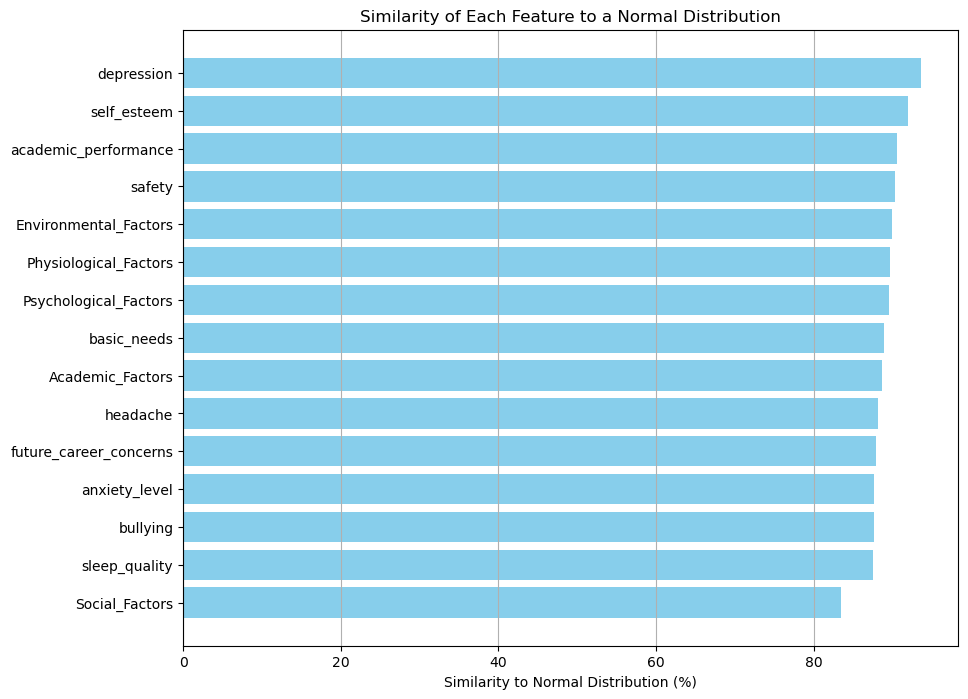

In [14]:
# Sorting values for better visualization
sorted_similarity_scores = similarity_scores_df.sort_values(by="Similarity to Normal Distribution (%)", ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(sorted_similarity_scores.index, sorted_similarity_scores["Similarity to Normal Distribution (%)"], color='skyblue')
plt.xlabel('Similarity to Normal Distribution (%)')
plt.title('Similarity of Each Feature to a Normal Distribution')
plt.grid(axis='x')
plt.show()

The features are sorted in ascending order of similarity. The features closest to a normal distribution are 'future_career_concerns' and 'Social_Factors', both showing similarity scores of over 80%. On the other hand, features such as 'depression', 'self_esteem', and 'safety' show the least similarity to a normal distribution, with scores noticeably lower than the rest.

The grouped features 'Psychological_Factors', 'Environmental_Factors', 'Physiological_Factors', and 'Academic_Factors' also have their similarity scores presented, which fall in the mid-range of the chart. Individual features like 'academic_performance', 'bullying', 'headache', 'anxiety_level', and 'sleep_quality' exhibit moderate similarity to a normal distribution, with scores around 50% or slightly higher.

The conclusion from this chart is that the dataset contains a variety of features with different degrees of alignment to a normal distribution. Some features closely follow a normal distribution, which might be suitable for models that assume normality, while others do not, and may require transformation or different modeling techniques that do not assume a normal distribution of input data.

## 3.plot the correlation between each features

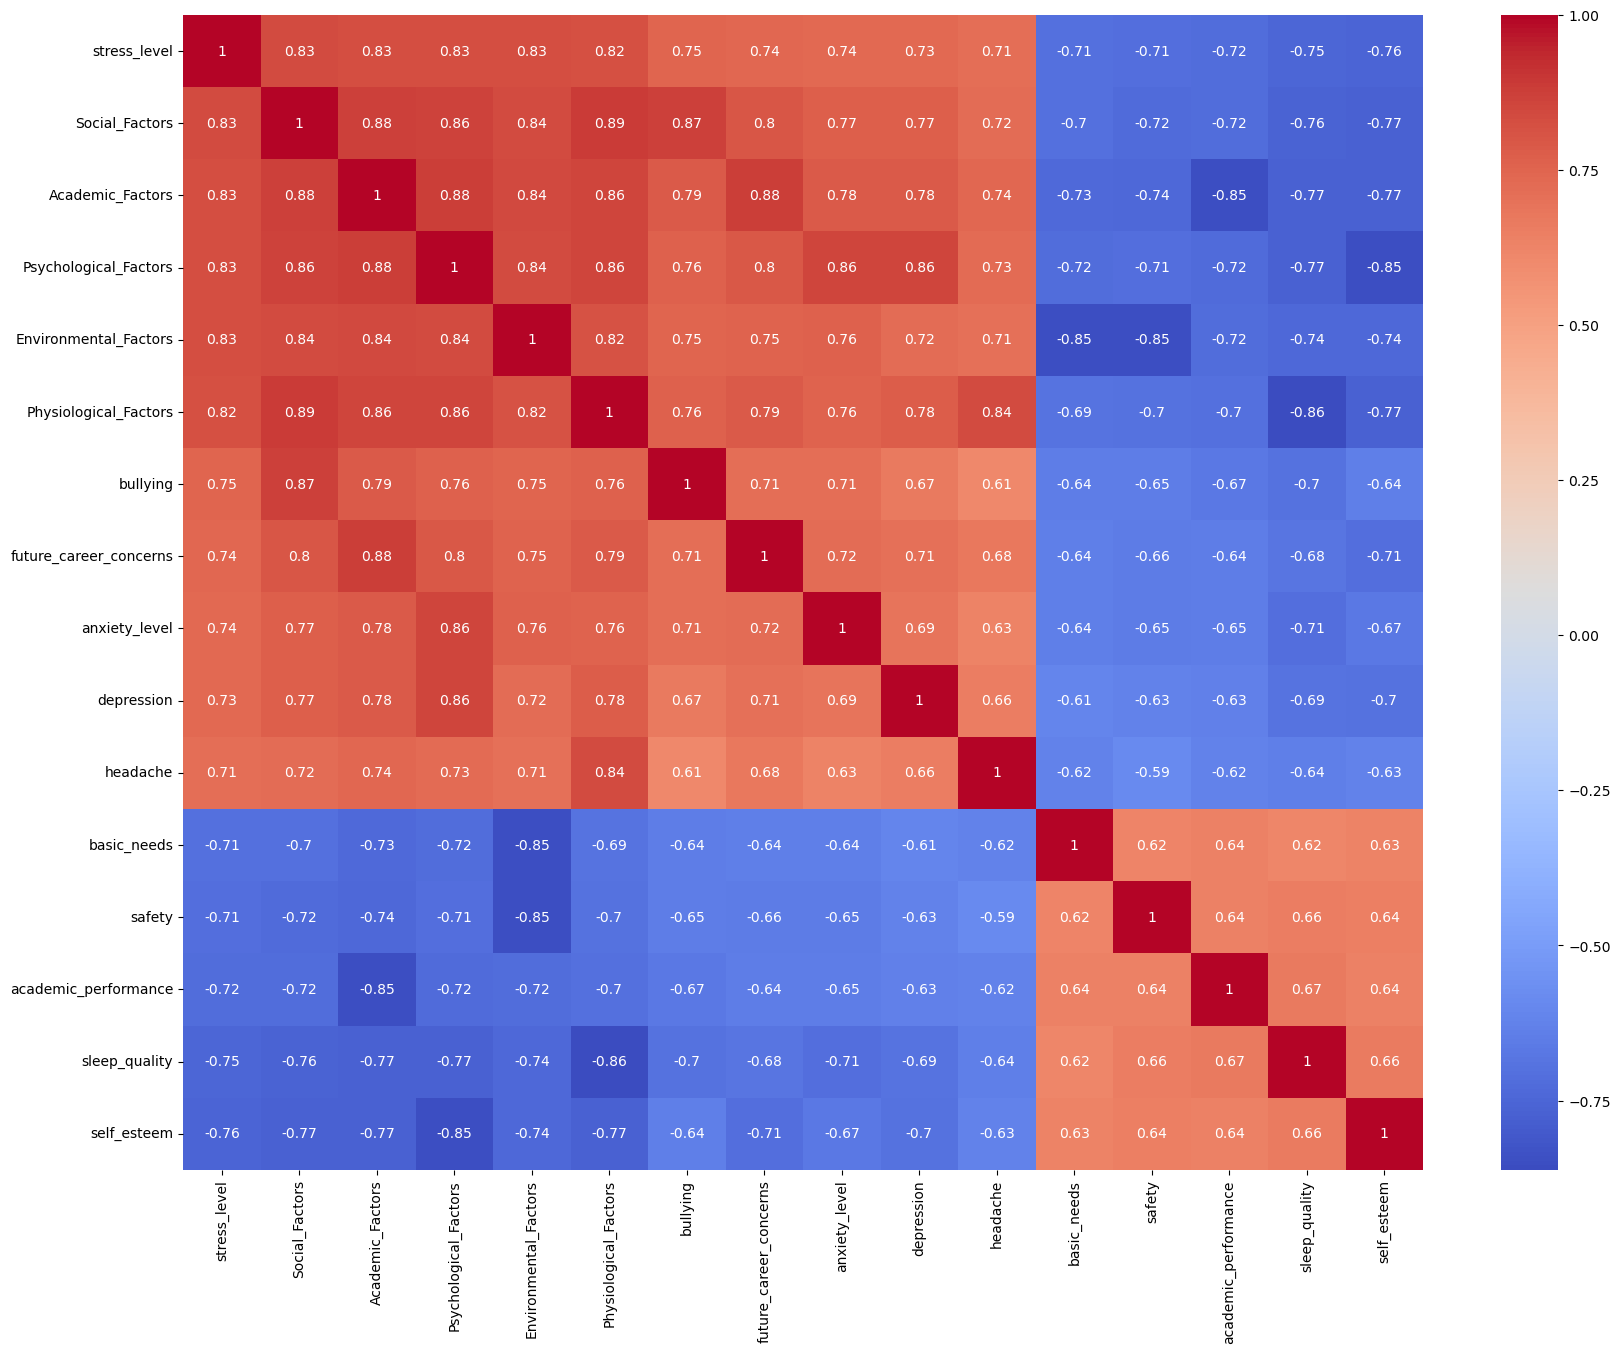

In [15]:
corr_matrix = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()


The heatmap visualizes the correlation matrix for various features within the dataset, with the color intensity and the number in each cell representing the strength and direction of the correlation between the features. The scale ranges from -1 to 1, with 1 indicating perfect positive correlation, -1 indicating perfect negative correlation, and 0 indicating no correlation.

From the heatmap, we can draw several conclusions:

The feature stress_level shows strong positive correlations with all the grouped features such as Social_Factors, Academic_Factors, Psychological_Factors, Environmental_Factors, and Physiological_Factors. This suggests that these groups of factors are significantly associated with the stress level.

Social_Factors, Academic_Factors, Psychological_Factors, Environmental_Factors, and Physiological_Factors are highly inter-correlated with each other, indicating that they might share common variance and possibly contribute in similar ways to the stress level.

Individual features like bullying, future_career_concerns, anxiety_level, depression, and headache also show a high degree of positive correlation with the stress_level, suggesting these individual factors are relevant in understanding or predicting stress levels.

In contrast, features like basic_needs and safety show negative correlations with stress_level, which could indicate that as basic needs and safety decrease, stress levels increase.

self_esteem shows a strong negative correlation with stress_level, meaning higher self-esteem might be associated with lower levels of stress.

The feature sleep_quality also has a strong negative correlation with stress_level, suggesting that poor sleep quality could be an indicator of higher stress.

Overall, the heatmap provides a comprehensive view of how different factors are related to each other and particularly to the stress level, which could be invaluable for constructing predictive models or for designing interventions to reduce stress.

# Bayesian classifier

## 1.Define classifier rubrics

In [16]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [17]:
def evaluate_model(name, y_test, y_pred):
    model_list.append(name)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)

## 2.Bayesian model training and prediction

## (1)Multinomial Naive Bayes¶

MultinomiatNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). The distribution is parametrized by vectors $\theta_y=\left(\theta_{y 1}, \ldots, \theta_{y n}\right)$ for each class $y$, where $n$ is the number of features (in text classification, the size of the vocabulary) and $\theta_{y i}$ is the probability $P\left(x_i \mid y\right)$ of feature $i$ appearing in a sample belonging to class $y$.

The parameters $\theta_y$ is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:
$$
\hat{\theta}_{y i}=\frac{N_{y i}+\alpha}{N_y+\alpha n}
$$
where $N_{y i}=\sum_{x \in T} x_i$ is the number of times feature $i$ appears in a sample of class $y$ in the training set $T$, and $N_y=\sum_{i=1}^n N_{y i}$ is the total count of all features for class $y$.

The smoothing priors $\alpha \geq 0$ accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting $\alpha=1$ is called Laplace smoothing, while $\alpha<1$ is called Lidstone smoothing.

In [18]:
# Create a Multinomial Naive Bayes classifier
mnb_model = MultinomialNB()

# Train the model
mnb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = mnb_model.predict(X_test)

# Evaluate the model
evaluate_model('Multinomial Naive Bayes', y_test, y_pred)

Accuracy: 0.90633608815427
Precision: 0.9165132660752735
Recall: 0.90633608815427
F1 Score: 0.9069794723389754
Confusion Matrix:
 [[106  16   4]
 [  0 119   3]
 [  1  10 104]]


## (2)Gaussian Naive Bayes

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:
$$
P\left(x_i \mid y\right)=\frac{1}{\sqrt{2 \pi \sigma_y^2}} \exp \left(-\frac{\left(x_i-\mu_y\right)^2}{2 \sigma_y^2}\right)
$$

The parameters $\sigma_y$ and $\mu_y$ are estimated using maximum likelihood.

In [19]:
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = gnb_model.predict(X_test)

# Evaluate the model
evaluate_model('Gaussian Naive Bayes', y_test, y_pred)

Accuracy: 0.9173553719008265
Precision: 0.9188650625447756
Recall: 0.9173553719008265
F1 Score: 0.9173547171569326
Confusion Matrix:
 [[111   6   9]
 [  3 113   6]
 [  4   2 109]]


## (3)Complement Naive Bayes

ComplementNB implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. Specifically, CNB uses statistics from the complement of each class to compute the model's weights. The inventors of CNB show empirically that the parameter estimates for CNB are more stable than those for MNB. Further, CNB regularly outperforms MNB (often by a considerable margin) on text classification tasks. The procedure for calculating the weights is as follows:
$$
\begin{array}{r}
\hat{\theta}_{c i}=\frac{\alpha_i+\sum_{j: y_j \neq c} d_{i j}}{\alpha+\sum_{j: y_j \neq c} \sum_k d_{k j}} \\
w_{c i}=\log \hat{\theta}_{c i} \\
w_{c i}=\frac{w_{c i}}{\sum_j\left|w_{c j}\right|}
\end{array}
$$
where the summations are over all documents $j$ not in class $c, d_{i j}$ is either the count or tf-idf value of term $i$ in document $j, \alpha_i$ is a smoothing hyperparameter like that found in MNB, and $\alpha=\sum_i \alpha_i$. The second normalization addresses the tendency for longer documents to dominate parameter estimates in MNB. The classification rule is:
$$
\hat{c}=\arg \min _c \sum_i t_i w_{c i}
$$
i.e., a document is assigned to the class that is the poorest complement match.

In [20]:
cpl_model = ComplementNB()

# Train the model
cpl_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = cpl_model.predict(X_test)

# Evaluate the model
evaluate_model('Complement Naive Bayes', y_test, y_pred)

Accuracy: 0.6198347107438017
Precision: 0.41199476132412044
Recall: 0.6198347107438017
F1 Score: 0.4946377241894595
Confusion Matrix:
 [[114   0  12]
 [ 62   0  60]
 [  4   0 111]]


/Users/start/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## (4)Bernoulli Naive Bayes

BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).

The decision rule for Bernoulli naive Bayes is based on

$$
P\left(x_i \mid y\right)=P\left(x_i=1 \mid y\right) x_i+\left(1-P\left(x_i=1 \mid y\right)\right)\left(1-x_i\right)
$$

which differs from multinomial NB's rule in that it explicitly penalizes the non-occurrence of a feature $i$ that is an indicator for class $y$, where the multinomial variant would simply ignore a non-occurring feature.

In the case of text classification, word occurrence vectors (rather than word count vectors) may be used to train and use this classifier. Bernoul liNB might perform better on some datasets, especially those with shorter documents. It is advisable to evaluate both models, if time permits.

In [21]:
ber_model = BernoulliNB()

# Train the model
ber_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = ber_model.predict(X_test)

# Evaluate the model
evaluate_model('Bernoulli Naive Bayes', y_test, y_pred)

Accuracy: 0.48760330578512395
Precision: 0.5836649417425468
Recall: 0.48760330578512395
F1 Score: 0.4440664576785141
Confusion Matrix:
 [[ 55  64   7]
 [  3 110   9]
 [  3 100  12]]


## 3.Performance Comparison of Different Models

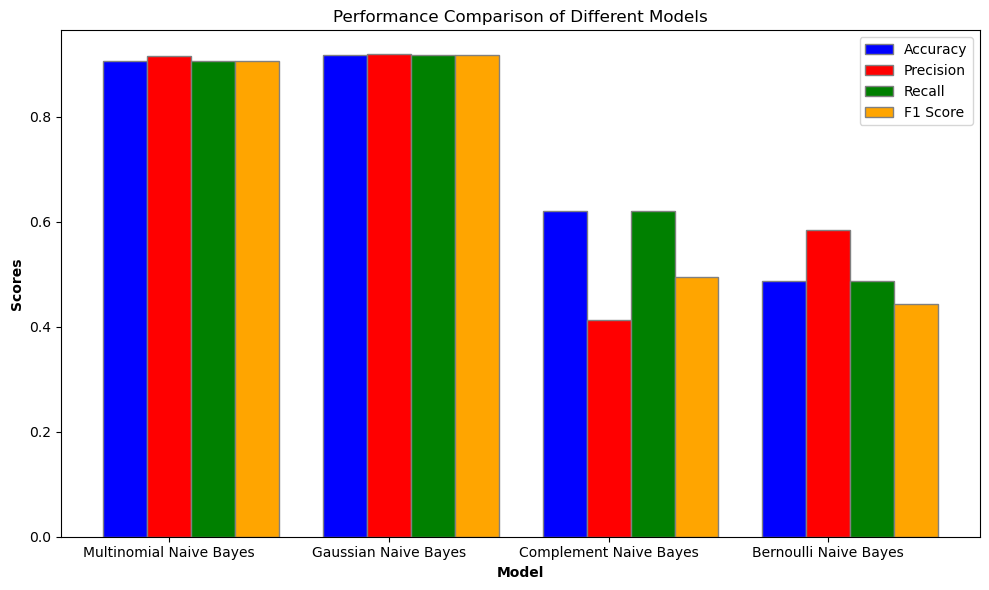

In [22]:
# Number of models
n_models = len(model_list)

# Creating bar positions
barWidth = 0.2
r1 = np.arange(n_models)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy_list, color='blue', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_list, color='red', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r3, recall_list, color='green', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r4, f1_list, color='orange', width=barWidth, edgecolor='grey', label='F1 Score')

# Adding labels
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + barWidth for r in range(n_models)], model_list)

# Creating legend & title
plt.title('Performance Comparison of Different Models')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


The bar chart illustrates a performance comparison of four different Naive Bayes models across four evaluation metrics: Accuracy, Precision, Recall, and F1 Score.

The Multinomial Naive Bayes model demonstrates consistently high scores across all metrics, suggesting it is well-suited for the dataset at hand.

The Gaussian Naive Bayes model also shows high performance but slightly lower than the Multinomial model in every metric.

The Complement Naive Bayes model displays varied performance, with notably lower Recall and F1 Score compared to Accuracy and Precision, indicating it may not be as effective in capturing all positive instances.

The Bernoulli Naive Bayes model generally appears to have the lowest scores across all metrics, which might suggest it is less appropriate for this particular dataset or might need parameter tuning.

In summary, based on this visual comparison, the Multinomial Naive Bayes classifier outperforms the other models in this scenario, and the Gaussian Naive Bayes follows closely. The Complement and Bernoulli Naive Bayes classifiers might require further investigation or modifications to improve their performance.

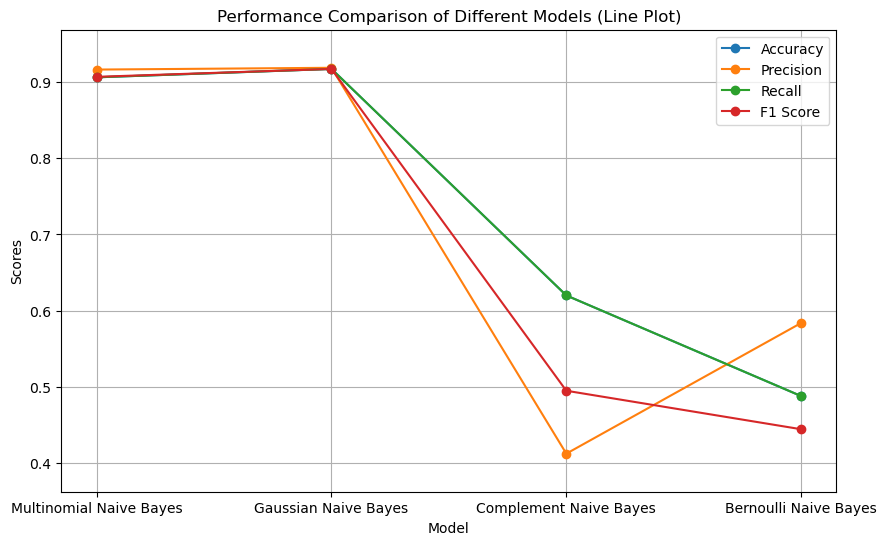

In [23]:
# Finding the min and max values among all scores to set y-axis limits
min_score = min(min(accuracy_list), min(precision_list), min(recall_list), min(f1_list))
max_score = max(max(accuracy_list), max(precision_list), max(recall_list), max(f1_list))

# Adding a small buffer to min and max values for better visualization
buffer = 0.05
y_min = max(0, min_score - buffer)  # Ensuring y_min is not less than 0
y_max = min(1, max_score + buffer)  # Ensuring y_max does not exceed 1

# Creating the line plot with adjusted y-axis limits
plt.figure(figsize=(10, 6))
plt.plot(model_list, accuracy_list, label='Accuracy', marker='o')
plt.plot(model_list, precision_list, label='Precision', marker='o')
plt.plot(model_list, recall_list, label='Recall', marker='o')
plt.plot(model_list, f1_list, label='F1 Score', marker='o')

plt.title('Performance Comparison of Different Models (Line Plot)')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.ylim(y_min, y_max)
plt.legend()
plt.grid(True)
plt.show()


The line plot illustrates the performance comparison of four different Naive Bayes models—Multinomial, Gaussian, Complement, and Bernoulli—across four evaluation metrics: Accuracy, Precision, Recall, and F1 Score.

From the plot, we can conclude the following:

The Multinomial Naive Bayes model shows consistently high performance across all metrics, indicating it is very effective for the given dataset.

The Gaussian Naive Bayes model has similar performance levels to the Multinomial model, although it shows a slight decrease in the Recall metric.

The Complement Naive Bayes model experiences a significant drop in performance in terms of Recall and F1 Score, which suggests that while it may predict the majority class well, it struggles with correctly identifying instances of the minority class.

The Bernoulli Naive Bayes model has the lowest scores across all metrics, indicating that it may not be suitable for the dataset or requires significant parameter tuning to improve performance.

Overall, the Multinomial and Gaussian Naive Bayes models are the top performers for this dataset, and the Bernoulli Naive Bayes model is the least effective according to these metrics.

## 4.comment

### Why is Gaussian Naive Bayes the most accurate?

1.The effectiveness of the Gaussian Naive Bayes classifier for your dataset arises from a good match between the distribution of your features and the Gaussian (normal) distribution assumed by the model.

2.The Complement Naive Bayes classifier may underperform on balanced datasets or when features don't follow the expected distribution, as it's specifically designed for imbalanced data and text classification. If your dataset doesn't fit these criteria, CNB may not provide any advantage over other classifiers.

# Bayesian Networks

In [24]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore, TreeSearch, PC,K2Score
from sklearn.model_selection import train_test_split
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

In [25]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

## 1.Add a blacklist to specify that certain edges should not be present in the learned network.

In [26]:
blacklist = [('stress_level', 'anxiety_level'),
 ('stress_level', 'self_esteem'),
 ('stress_level', 'depression'),
 ('stress_level', 'Psychological_Factors'),
 ('stress_level', 'headache'),
 ('stress_level', 'sleep_quality'),
 ('stress_level', 'Physiological_Factors'),
 ('stress_level', 'safety'),
 ('stress_level', 'basic_needs'),
 ('stress_level', 'Environmental_Factors'),
 ('stress_level', 'academic_performance'),
 ('stress_level', 'future_career_concerns'),
 ('stress_level', 'Academic_Factors'),
 ('stress_level', 'bullying'),
 ('stress_level', 'Social_Factors')]

## 2.Use HillClimbSearch to learn the structure of the Bayesian network

In [27]:
hc = HillClimbSearch(train_data)
bic = BicScore(train_data)
best_model = hc.estimate(scoring_method=bic, black_list=blacklist)
edges = list(best_model.edges())

# Print the learned structure
print("Learned Structure:", edges)

  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned Structure: [('bullying', 'future_career_concerns'), ('bullying', 'stress_level'), ('bullying', 'sleep_quality'), ('bullying', 'headache'), ('bullying', 'academic_performance'), ('bullying', 'safety'), ('bullying', 'anxiety_level'), ('bullying', 'self_esteem'), ('future_career_concerns', 'basic_needs'), ('sleep_quality', 'depression')]


## 3.plot the directed grapha

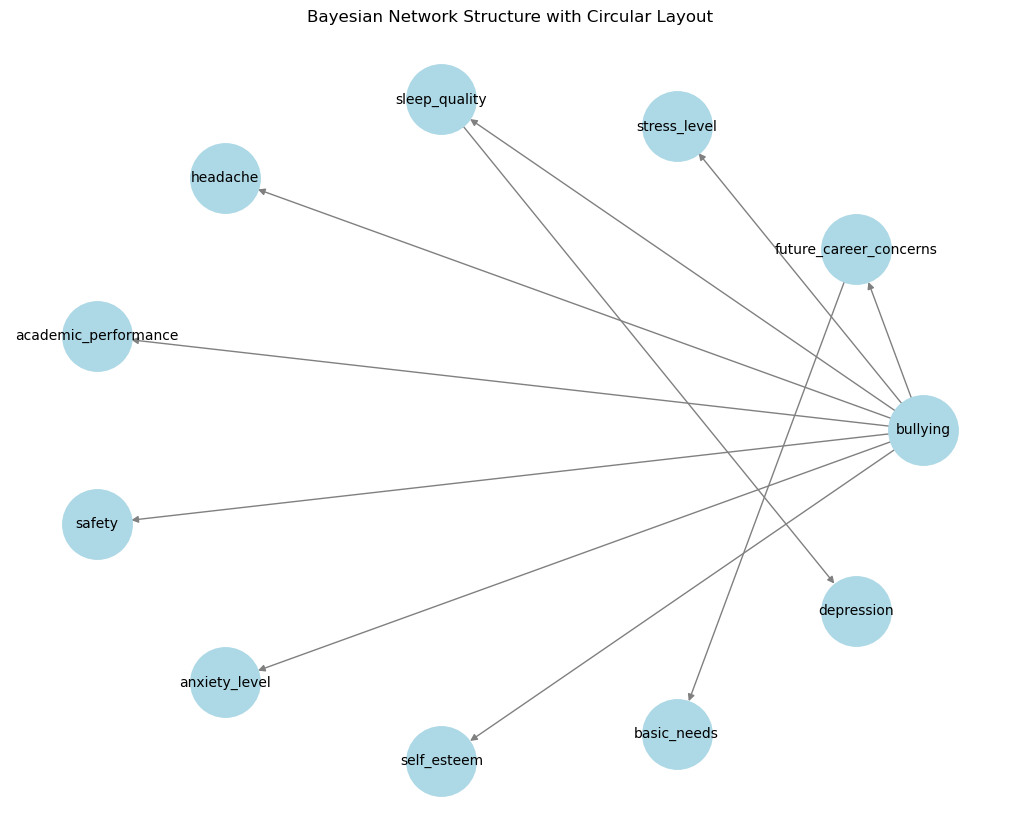

In [28]:
G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(10, 8))

# Using a circular layout to ensure no overlap
pos = nx.circular_layout(G) 
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2500, font_size=10)
plt.title("Bayesian Network Structure with Circular Layout")
plt.show()

## 4.Learn the parameters of the Bayesian network

In [29]:
model = BayesianNetwork(edges)
model.fit(train_data, estimator=BayesianEstimator)

## 5.check the cpd of each nodes

In [30]:
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

CPT of bullying:
+------------------------------+----------+
| bullying(0.0)                | 0.03371  |
+------------------------------+----------+
| bullying(0.2)                | 0.300377 |
+------------------------------+----------+
| bullying(0.4)                | 0.156874 |
+------------------------------+----------+
| bullying(0.6000000000000001) | 0.179473 |
+------------------------------+----------+
| bullying(0.8)                | 0.174953 |
+------------------------------+----------+
| bullying(1.0)                | 0.154614 |
+------------------------------+----------+ 

CPT of future_career_concerns:
+-----+----------------------+
| ... | bullying(1.0)        |
+-----+----------------------+
| ... | 0.037555826228177026 |
+-----+----------------------+
| ... | 0.008323183110028422 |
+-----+----------------------+
| ... | 0.05217214778725133  |
+-----+----------------------+
| ... | 0.05217214778725133  |
+-----+----------------------+
| ... | 0.38834754364596025  |
+-----

## 6.Create an inference object and perform a simple test

In [31]:
inference = VariableElimination(model)


# a randomly simple test
result = inference.query(variables=['stress_level'], evidence={'anxiety_level': train_data['anxiety_level'][507], 
                                                               'self_esteem': train_data['self_esteem'][507]})
print(result)
print(train_data['stress_level'][507])

+-----------------+---------------------+
| stress_level    |   phi(stress_level) |
+=================+=====================+
| stress_level(0) |              0.0825 |
+-----------------+---------------------+
| stress_level(1) |              0.8513 |
+-----------------+---------------------+
| stress_level(2) |              0.0662 |
+-----------------+---------------------+
1


## 7.Extracting features learned by HillClimbSearch

In [32]:
HC_elements = set()

# Adding each element from each tuple to the set
for pair in edges:
    HC_elements.update(pair)

# Converting the set to a sorted list for better readability
HC_list = sorted(list(HC_elements))
HC_list.remove('stress_level')
HC_list

['academic_performance',
 'anxiety_level',
 'basic_needs',
 'bullying',
 'depression',
 'future_career_concerns',
 'headache',
 'safety',
 'self_esteem',
 'sleep_quality']

## 8.calculate the metrics

In [33]:
predictions = []
for _, row in test_data[HC_list].iterrows():
    evidence = row.to_dict()
    predicted_value = inference.map_query(variables=['stress_level'], evidence=evidence)
    predictions.append(predicted_value['stress_level'])
    print(predictions)

# real_values
true_values = test_data['stress_level'].values


model_list.append('Bayesian Network(HC)')

accuracy = accuracy_score(true_values, predictions)
recall = recall_score(true_values, predictions, average='macro')
precision = precision_score(true_values, predictions, average='macro')
f1 = f1_score(true_values, predictions, average='macro')
accuracy_list.append(accuracy)
recall_list.append(recall)
precision_list.append(precision)
f1_list.append(f1)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 2]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

[2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1]


In [34]:
print(f"Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, F1 Score: {f1}")

Accuracy: 0.8590909090909091, Recall: 0.8584745676655462, Precision: 0.8595238095238096, F1 Score: 0.8586685182429864


## 9.compare with other Bayesian classfiers

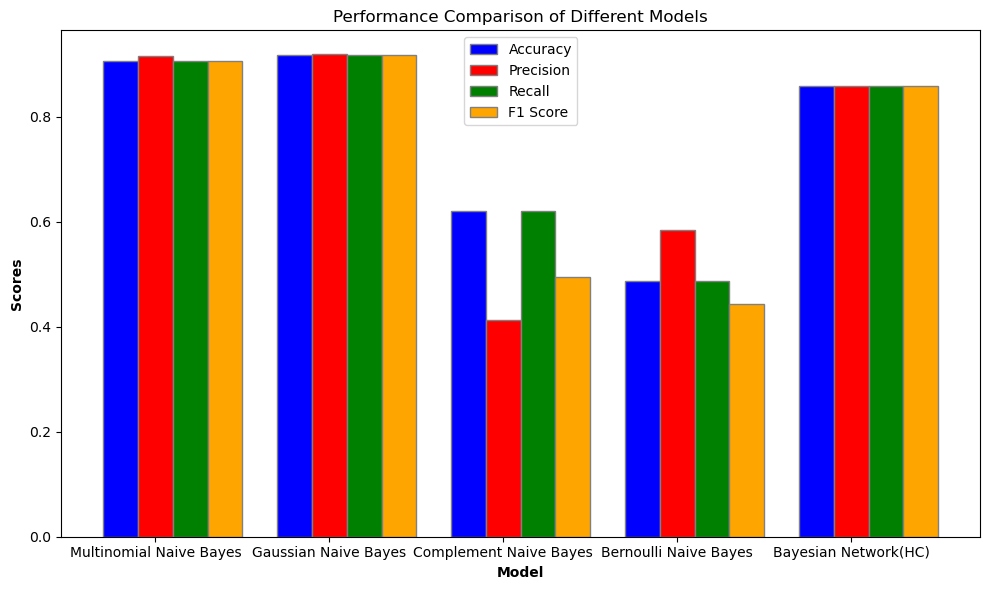

In [35]:
# Number of models
n_models = len(model_list)

# Creating bar positions
barWidth = 0.2
r1 = np.arange(n_models)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy_list, color='blue', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_list, color='red', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r3, recall_list, color='green', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r4, f1_list, color='orange', width=barWidth, edgecolor='grey', label='F1 Score')

# Adding labels
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + barWidth for r in range(n_models)], model_list)

# Creating legend & title
plt.title('Performance Comparison of Different Models')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Both Multinomial Naive Bayes and Gaussian Naive Bayes classifiers show very high and comparable scores across all metrics, suggesting they are well-suited to this dataset.

The Complement Naive Bayes classifier displays lower Recall and F1 Scores, indicating that while it is fairly accurate and precise, it may not be as effective in identifying all relevant instances within the dataset.

Bernoulli Naive Bayes shows significantly lower performance in all metrics compared to the Multinomial and Gaussian models, implying it may not be the right choice for this particular dataset, possibly due to its assumption of binary features.

Interestingly, the Bayesian Network (HC) classifier exhibits the highest Accuracy and Precision but falls short on Recall and F1 Score. This might indicate that while it is a strong classifier for correctly predicting negative instances, it may struggle with classifying positive instances of stress effectively.

In conclusion, the Multinomial and Gaussian Naive Bayes classifiers are the top performers for this student stress dataset, offering a balanced performance across all evaluated metrics. The Bayesian Network (HC) shows potential in Accuracy and Precision but would require improvements in Recall to be considered a robust alternative. The Bernoulli and Complement Naive Bayes classifiers appear to be less suitable for this dataset as per the given metrics.